# ML: Supervised algorithm - Decision Tree Regressor - Property Prices

## Introduction

A price prediction tool for flat prices in California is modelled.

## 1. Import libraries

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import r2_score

Start by loading libraries. In this case, to model a decision tree we need sklearn's DecissionTreeRegressor library. Additionally, we will use the packages plot_tree, export_grpahviz and export_text to visualise the resulting tree. 

## 2. Load datasets

In [2]:
# Generating data for the linear regression problem
california_housing = fetch_california_housing(as_frame=True)

# Dataset description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Loading the data and requesting the documentation via DESCR. This dataset contains a total of 8 predictor variables, all numeric. So we would not need to apply any transformation. 

## 3. Dataset analysis

In [3]:
dataset = california_housing.frame
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Perform a simple scan of the data, to verify the correct loading and structure of the dataset with the head() function.

## 4. Train model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                                        california_housing.data.drop('AveBedrms', axis = 1),
                                        california_housing.target,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Create the samples for both training and testing. With a 20% sample to evaluate the model after training. 

### Model 1

In [6]:
# Initialising the model with default parameters 
dtree_model = DecisionTreeRegressor(random_state = 1234)

# Fitting model to data
dtree_model.fit(X_train,  y_train)

DecisionTreeRegressor(random_state=1234)

Define the default hyperparameter model, giving freedom to expand the tree until the algorithm reduces the errors as much as possible.

Fit the model to the training data with the help of the fit() function.

In [7]:
# Prediction for Test and Train dataset
y_pred_train1 = dtree_model.predict(X_train)
y_pred_test1 = dtree_model.predict(X_test)

# Model info.
print("Tree depth:", dtree_model.get_depth())
print("Number of terminal nodes:", dtree_model.get_n_leaves())
print("Train Coefficient of determination R^2:", r2_score(y_train, y_pred_train1))
print("Test Coefficient of determination R^2:", r2_score(y_test, y_pred_test1))

Tree depth: 36
Number of terminal nodes: 15915
Train Coefficient of determination R^2: 1.0
Test Coefficient of determination R^2: 0.6138376706389224


Use the model to predict, both for the test sample and for the train. In this case we find that the coefficient of determination R2 is equal to 100% for the train case. While in the test case it is 69%. This case represents a typical case of over-fitting of the data. On the one hand, we obtain "perfect" metrics for the training set, but when we evaluate it with a new set such as the test set, we do not obtain such optimal results.  This is why we usually limit the parameters of the model. 

It should be noted that the resulting tree has a depth of 36 levels. Let's modify the model parameters to have a new approximation. 

### Model 2

In [8]:
# Initialising the model with default parameters 
dtree_model_2 = DecisionTreeRegressor(random_state = 1234, max_depth = 10, min_samples_split = 10)

# Fitting model to data
dtree_model_2.fit(X_train,  y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=1234)

Repeat the procedure but this time we include the max_depth parameter limiting the depth of the tree to 10 levels and including a limitation associated with the minimum number of samples to subdivide a min_samples_split node. 

In [9]:
# Prediction for Test and Train dataset
y_pred_train2 = dtree_model_2.predict(X_train)
y_pred_test2 = dtree_model_2.predict(X_test)

# Model info.
print("Tree depth:", dtree_model_2.get_depth())
print("Train Coefficient of determination R^2:", r2_score(y_train, y_pred_train2))
print("Test Coefficient of determination R^2:", r2_score(y_test, y_pred_test2))

Tree depth: 10
Train Coefficient of determination R^2: 0.8137511310154779
Test Coefficient of determination R^2: 0.6982276591114422


Evaluating the results, we obtain a coefficient of determination R2 of 81.3% in the train while in the test we improve the metric with 69.81%. 

Tree depth: 10
Number of terminal nodes: 552


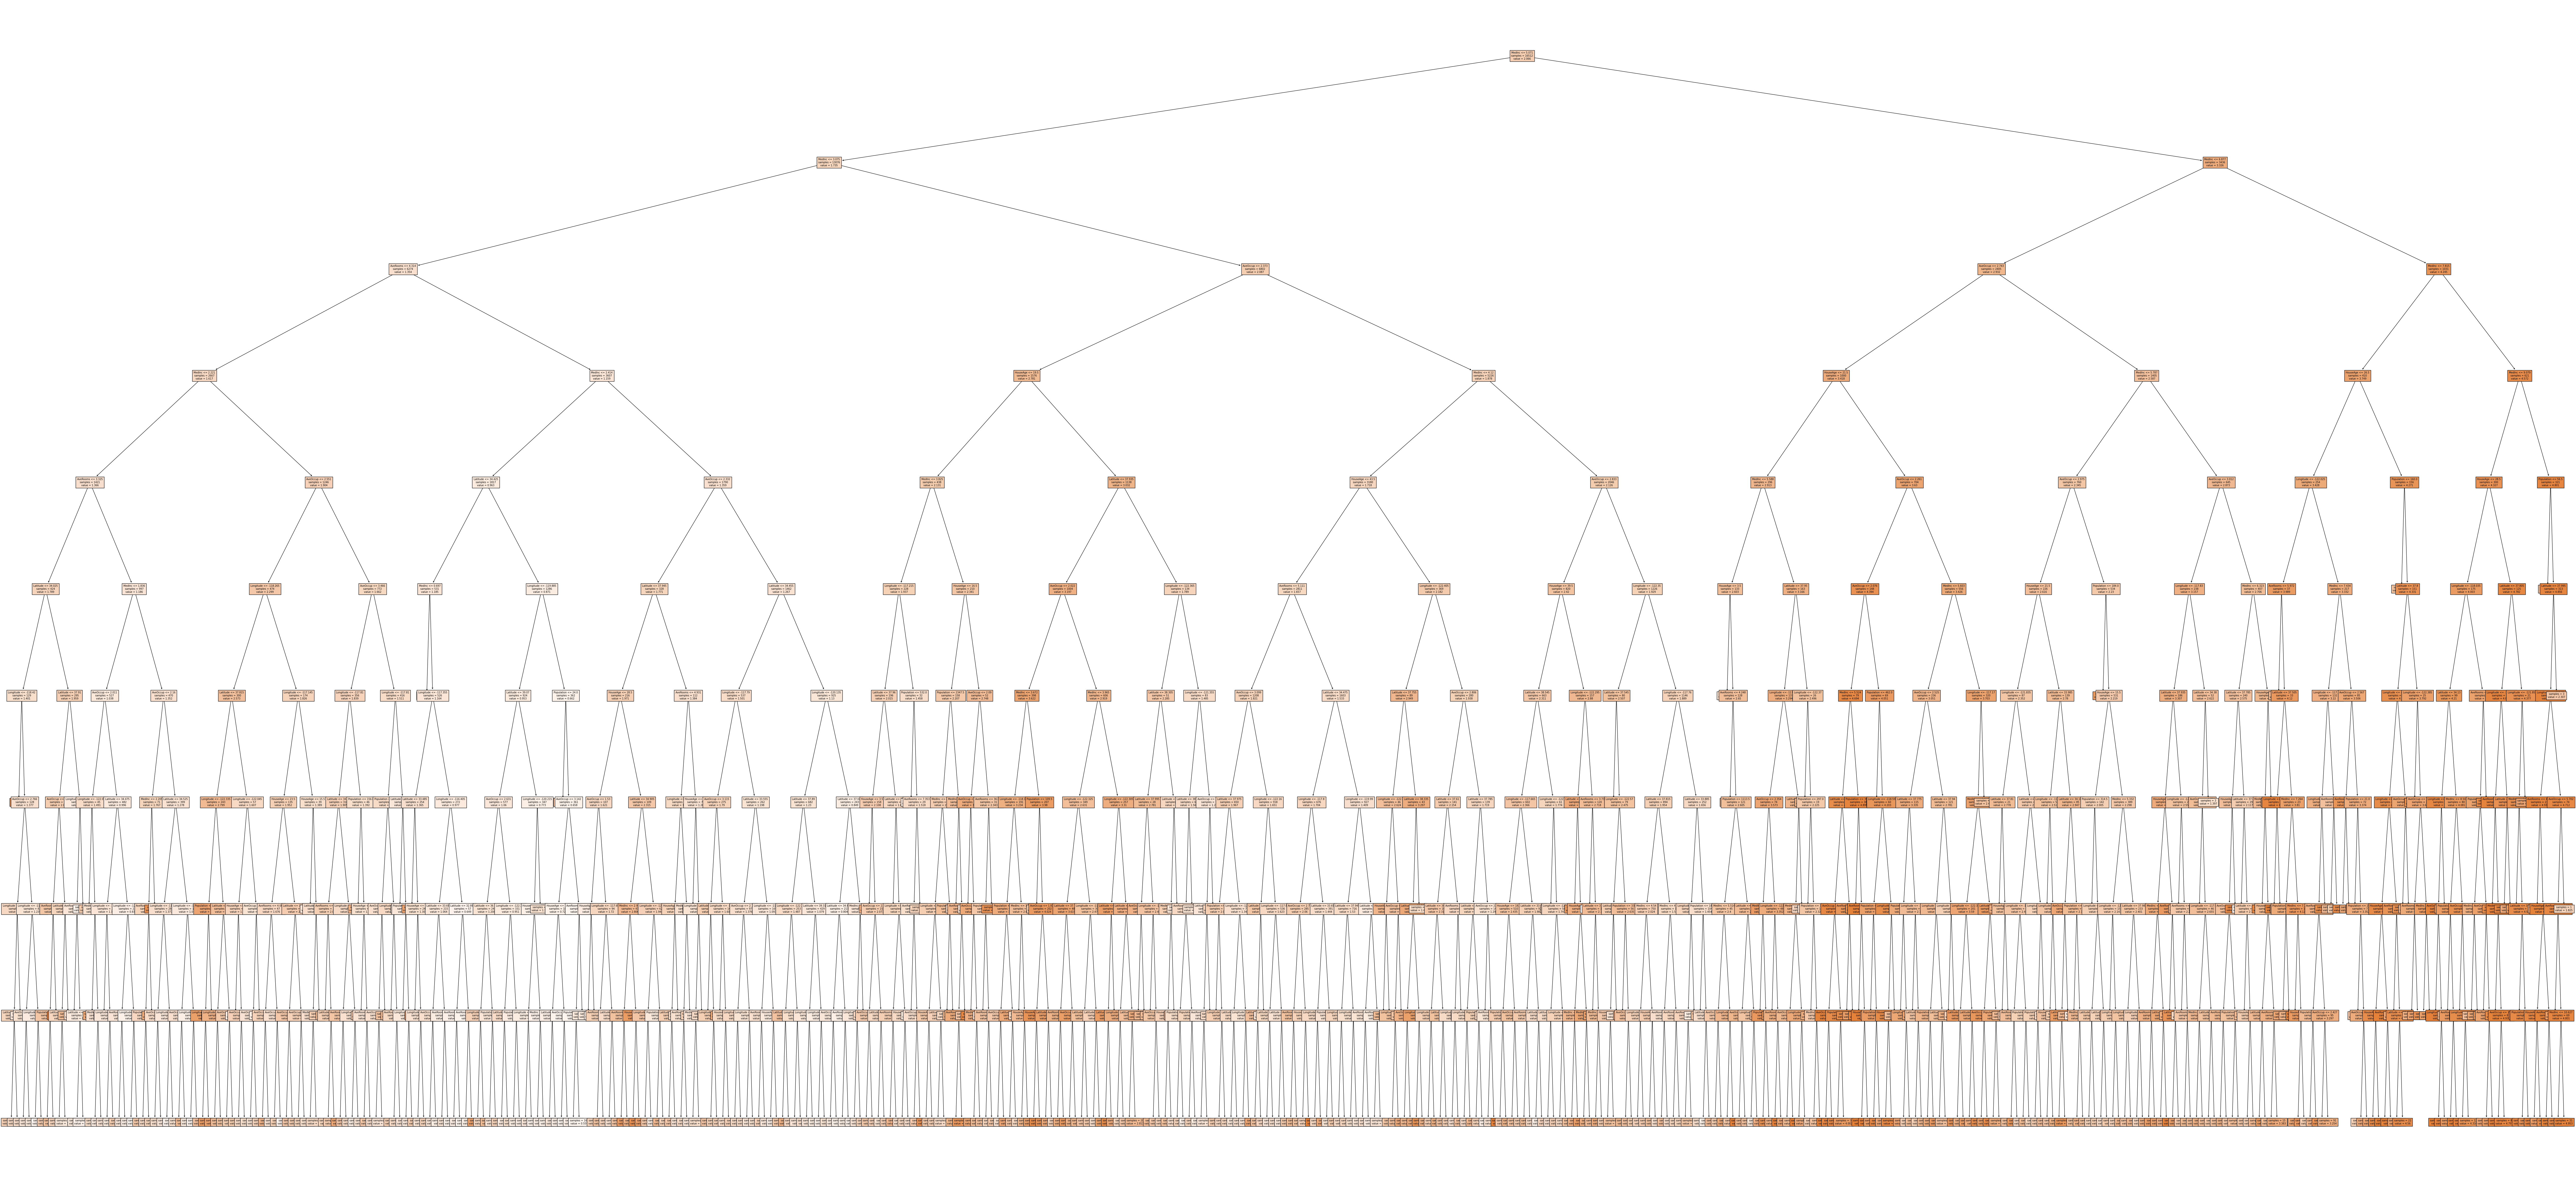

In [10]:
# Decision tree visualisation
fig, ax = plt.subplots(figsize=(130, 60))

print(f"Tree depth: {dtree_model_2.get_depth()}")
print(f"Number of terminal nodes: {dtree_model_2.get_n_leaves()}")

labels = X_train.columns

plot = plot_tree(
            decision_tree = dtree_model_2,
            feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax)

As you can see, even restricting the tree to a maximum depth of 10 levels makes it difficult to analyse the final visualisation of the tree. This is why the trade-off between good metrics and model complexity is usually balanced, especially in order to make use of this visualisation to analyse the predictive variables. 